In [1]:
import pymysql
import pandas as pd

In [2]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Avi985123@",
    "database": "sales"
}


In [3]:
queries = {
    "Question 1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest value? Use is_valid = 1 to filter transaction data.": 
    """
    SELECT 
        DATE_FORMAT(order_date, '%m') AS Month_ID,
        DATE_FORMAT(order_date, '%M') AS Month_Name,
        DATE_FORMAT(order_date, '%Y') AS Year,
        SUM(after_discount) AS total_transaction
    FROM order_details
    WHERE YEAR(order_date) = 2021 AND is_valid = 1
    GROUP BY Month_ID, Month_Name, Year
    ORDER BY total_transaction DESC;
    """,

    "Question 2: During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data.":
    """
         SELECT
        skudet.category,
        SUM(after_discount) AS total_transaction
        FROM order_details AS ordet
        JOIN sku_details AS skudet
        ON ordet.sku_id = skudet.id
        WHERE is_valid = 1 AND YEAR(ordet.order_date) = 2022
        GROUP BY skudet.category
        ORDER BY total_transaction DESC;

    """,

    "Question 3: Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which experienced a decrease in transaction value from 2021. Use is_valid = 1 to filter transaction data.":
    """
    WITH final_table AS (
        SELECT 
            skudet.category,
            SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
            SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
        FROM order_details AS ordet
        JOIN sku_details AS skudet
            ON ordet.sku_id = skudet.id
        WHERE ordet.is_valid = 1
        GROUP BY skudet.category
    )
    SELECT *, 
        (transaction_2022 - transaction_2021) AS change_in_value,
        CASE 
            WHEN transaction_2022 > transaction_2021 THEN 'Increase'
            ELSE 'Decrease'
        END AS Remark
    FROM final_table;
    """,

    "Question 4: Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data.":
    """
    SELECT
        paydet.payment_method,
        DATE_FORMAT(ordet.order_date, '%Y') AS Year,
        COUNT(DISTINCT ordet.id) AS Frequency
    FROM order_details AS ordet
    JOIN payment_details AS paydet
        ON ordet.payment_id = paydet.id
    WHERE is_valid = 1 AND YEAR(ordet.order_date) = 2022
    GROUP BY paydet.payment_method, Year
    ORDER BY Frequency DESC
    LIMIT 5;
    """,

    "Question 5: Sort these 5 products based on their transaction values. Products: Samsung, Apple, Sony, Huawei, Lenovo. Use is_valid = 1 to filter transaction data.":
    """
    WITH final_product AS (
        SELECT 
            CASE 
                WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                     OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                     OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
            END AS product_brand,
            SUM(ordet.after_discount) AS total_transaction
        FROM order_details AS ordet
        JOIN sku_details AS skudet
            ON ordet.sku_id = skudet.id
        WHERE is_valid = 1
        GROUP BY product_brand
    )
    SELECT * 
    FROM final_product 
    WHERE product_brand IS NOT NULL
    ORDER BY total_transaction DESC;
    """
}


In [4]:
from IPython.display import display

In [5]:
from IPython.display import display

# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connected successfully")

    # Execute each query and display result
    for Question, Query in queries.items():
        print(f"\n--- {Question} ---")
        df = pd.read_sql(Query, connection)
        display(df)

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    if connection:
        connection.close()
        print("Database connection closed")


Database connected successfully

--- Question 1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest value? Use is_valid = 1 to filter transaction data. ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\4066969336.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, connection)


,Month_ID,Month_Name,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- Question 2: During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\4066969336.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, connection)


,category,total_transaction
0,Mobiles & Tablets,9.128256e+08
1,Entertainment,3.611392e+08
2,Appliances,3.095840e+08
3,Computing,2.124082e+08
4,Men Fashion,1.333326e+08
5,Women Fashion,9.023613e+07
6,Home & Living,7.865896e+07
7,Health & Sports,5.200838e+07
8,Beauty & Grooming,4.559842e+07
9,Superstore,3.264327e+07



--- Question 3: Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which experienced a decrease in transaction value from 2021. Use is_valid = 1 to filter transaction data. ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\4066969336.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, connection)


,category,transaction_2021,transaction_2022,change_in_value,Remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,Increase
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,Increase
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,Increase
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,Increase
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,Increase
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,Increase
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,Increase
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,Increase
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,Increase
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,Increase



--- Question 4: Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\4066969336.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, connection)


,payment_method,Year,Frequency
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- Question 5: Sort these 5 products based on their transaction values. Products: Samsung, Apple, Sony, Huawei, Lenovo. Use is_valid = 1 to filter transaction data. ---


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\4066969336.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(Query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed


In [6]:
import os

In [7]:
db_config = {
    "host": "localhost",
    "user": "root",
    "password": "Avi985123@",
    "database": "sales"
}


In [8]:
## Folder Path to csv files
output_folder ="C:/Users/DELL/Downloads/Google Looker Project"  # Use the path you copied
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist


In [9]:
## List of tables to export
tables=["customer_details","order_details","sku_details","payment_details"]

In [10]:
try:
    # connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful")

    for table in tables:
        print(f"Exporting table: {table}")

        # sql query to fetch all data from table
        query = f"SELECT * from {table};"

        # Read table data into dataframe
        df = pd.read_sql(query, connection)

        # save the dataframe to a csv file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        print(f"Table {table} exported successfully to {output_file}.")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed")


Database connection successful
Exporting table: customer_details


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\1544098223.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table customer_details exported successfully to C:/Users/DELL/Downloads/Google Looker Project\customer_details.csv.
Exporting table: order_details
Table order_details exported successfully to C:/Users/DELL/Downloads/Google Looker Project\order_details.csv.
Exporting table: sku_details
Table sku_details exported successfully to C:/Users/DELL/Downloads/Google Looker Project\sku_details.csv.
Exporting table: payment_details
Table payment_details exported successfully to C:/Users/DELL/Downloads/Google Looker Project\payment_details.csv.
Database connection closed


In [11]:
df_order = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/order_details.csv")
df_customer = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/customer_details.csv")
df_payment = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/payment_details.csv")
df_sku = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/sku_details.csv")


In [12]:
df_sku.rename(columns={'id':'sku_id'},inplace=True) 
df_customer.rename(columns={'id':'customer_id'},inplace=True)
df_payment.rename(columns={'id':'payment_id'},inplace=True)

In [13]:
df = df_order \
    .merge(df_sku, how='left', on='sku_id') \
    .merge(df_customer, how='left', on='customer_id') \
    .merge(df_payment, how='left', on='payment_id')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5764 non-null   object 
 1   customer_id        5764 non-null   object 
 2   order_date         5764 non-null   object 
 3   sku_id             5764 non-null   object 
 4   price              5764 non-null   int64  
 5   qty_ordered        5764 non-null   int64  
 6   before_discount    5764 non-null   float64
 7   discount_amount    5764 non-null   float64
 8   after_discount     5764 non-null   float64
 9   is_gross           5764 non-null   int64  
 10  is_valid           5764 non-null   int64  
 11  is_net             5764 non-null   int64  
 12  payment_id         5764 non-null   int64  
 13  sku_name           5764 non-null   object 
 14  base_price         5764 non-null   float64
 15  cogs               5764 non-null   float64
 16  Category           5764 

In [15]:
print(df_payment.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [16]:
print(df_order.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [17]:
# ensure both columns have same data type before merging
df_payment['payment_id'] = df_payment['payment_id'].astype(str) ##convert to string
df_order['id'] = df_order['id'].astype(str) ##convert to string

#merge order_details with payment_details without renaming columns
df_sample= pd.merge(df_payment, df_order, how='left', left_on='payment_id', right_on='id')

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [18]:
## change columns to datetime format using for loop
## use pandas.to_datetime to convert
for x in ['order_date','registration_date']:
    df[x]=pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5764 non-null   object        
 1   customer_id        5764 non-null   object        
 2   order_date         5764 non-null   datetime64[ns]
 3   sku_id             5764 non-null   object        
 4   price              5764 non-null   int64         
 5   qty_ordered        5764 non-null   int64         
 6   before_discount    5764 non-null   float64       
 7   discount_amount    5764 non-null   float64       
 8   after_discount     5764 non-null   float64       
 9   is_gross           5764 non-null   int64         
 10  is_valid           5764 non-null   int64         
 11  is_net             5764 non-null   int64         
 12  payment_id         5764 non-null   int64         
 13  sku_name           5764 non-null   object        
 14  base_pri

Question 1
Dear Data Analyst,
As part of our Year-End Festival competition, the company plans to award prizes to our top customers. To facilitate this, the Marketing Team requires an analysis to estimate the prizes for the winners. Specifically, we need data on the TOP 5 Products in the Mobiles & Tablets Category for the year 2022, ranked by the highest sales quantities (where valid = 1).
We would appreciate it if you could compile and share this information with us before the end of this month to ensure we meet our planning deadlines.

Thank you for your continued support and collaboration.
Best regards,
Marketing Teameting Team

In [19]:
top_5_prod = pd.DataFrame(
    # filter the columns as needed
    df[(df['Category'] == 'Mobiles & Tablets') & 
       (df['is_valid'] == 1) & 
       (df['order_date'].dt.year == 2022)]\
    # aggregate using groupby method
    .groupby(by=['sku_name', 'Category'])['qty_ordered'].sum()\
    # reset the index to convert result into dataframe
    .reset_index(name='qty_ordered')\
    # sort the value from the largest to the lowest
    .sort_values(by='qty_ordered', ascending=False)\
    # select top 5 row
    .head(5).reset_index(drop=True)
)

top_5_prod


,sku_name,Category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31
2,Infinix Hot 4-Gold,Mobiles & Tablets,15
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11
4,infinix_Zero 4-Grey,Mobiles & Tablets,10


<Axes: title={'center': 'Top 5 Products'}, xlabel='product Name', ylabel='Quantity'>

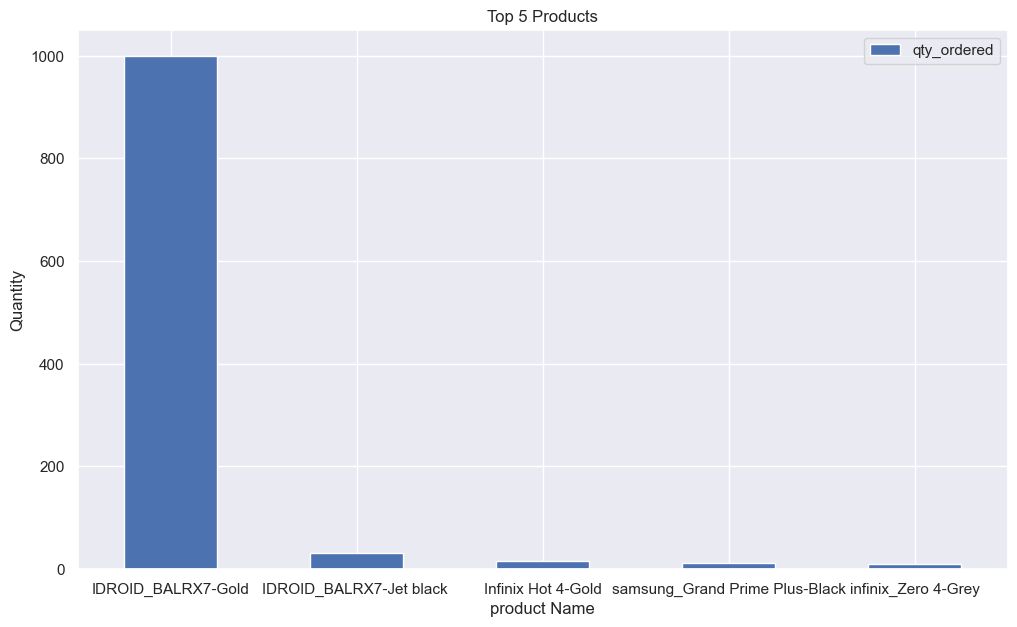

In [20]:
import seaborn as sns
sns.set()
top_5_prod.plot(x='sku_name',
                y=['qty_ordered'],
                kind='bar',
                grid=True,
                xlabel='product Name',
                ylabel='Quantity',
                figsize=(12,7),
                rot=0,
                title='Top 5 Products',
                table=False,
                secondary_y=False)
                

<Axes: title={'center': 'Top 5 Products'}, xlabel='Quantity', ylabel='Product Name'>

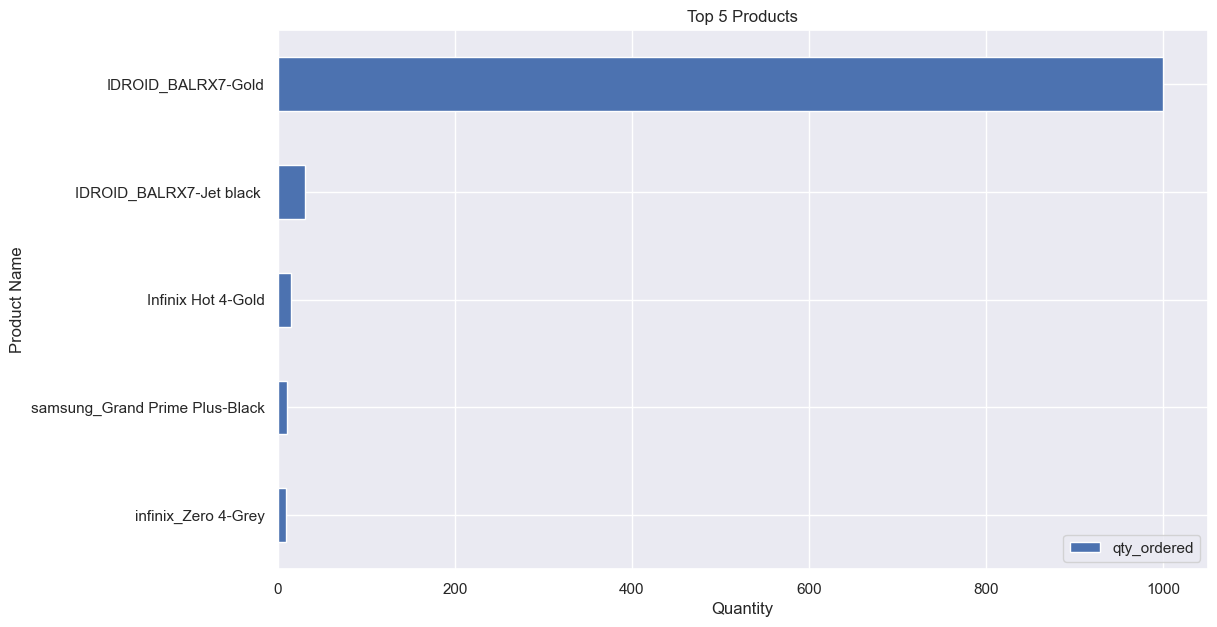

In [21]:
#change chart to horizontal bar chart and sort values from highest to lowest.
top_5_prod.sort_values(by='qty_ordered',ascending=True,inplace=True)
sns.set()
top_5_prod.plot(x='sku_name',
                y=['qty_ordered'],
                kind='barh',
                grid=True,
                xlabel='Quantity',
                ylabel='Product Name',
                figsize=(12,7),
                rot=0,
                title='Top 5 Products',
                table=False,
                secondary_y=False)
                       

Question 2
Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in the “Others” category as of the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021. (Please also include data for the 15th category.)

If a decrease in sales quantity for the “Others” category is confirmed, we would appreciate it if you could provide details of the top 20 products that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

Please share the requested data within 4 days. We sincerely appreciate your assistance and cooperation.

Best regards,
Warehouse Team

In [22]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(
    # filter is_valid = 1 and year 2021
    df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2021)]
    # groupby quantity
    .groupby(by=['Category'])['qty_ordered'].sum()
    # convert to dataframe
    .reset_index(name='qty_ordered_2021')
)

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(
    # filter is_valid = 1 and year 2022
    df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]
    # groupby quantity
    .groupby(by=['Category'])['qty_ordered'].sum()
    # convert to dataframe
    .reset_index(name='qty_ordered_2022')
)

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='Category')

# show
cat_data_2021_2022


,Category,qty_ordered_2021,qty_ordered_2022
0,Appliances,124,146
1,Beauty & Grooming,164,152
2,Books,171,195
3,Computing,109,151
4,Entertainment,73,149
5,Health & Sports,168,197
6,Home & Living,189,249
7,Kids & Baby,166,224
8,Men Fashion,235,173
9,Mobiles & Tablets,107,1153


In [23]:
# add new column named 'qty_growth'
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(
    growth_percentage = lambda x: round((x['qty_growth'] / x['qty_ordered_2021']) * 100, 2)
)

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
    if delta < 0:
        return 'DOWN'
    elif delta == 0:
        return 'FAIR'
    else:
        return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022


,Category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,422,254,-168,-39.81,DOWN
1,Soghaat,753,607,-146,-19.39,DOWN
2,Men Fashion,235,173,-62,-26.38,DOWN
3,Beauty & Grooming,164,152,-12,-7.32,DOWN
4,Appliances,124,146,22,17.74,UP
5,Books,171,195,24,14.04,UP
6,Health & Sports,168,197,29,17.26,UP
7,Computing,109,151,42,38.53,UP
8,School & Education,182,235,53,29.12,UP
9,Kids & Baby,166,224,58,34.94,UP


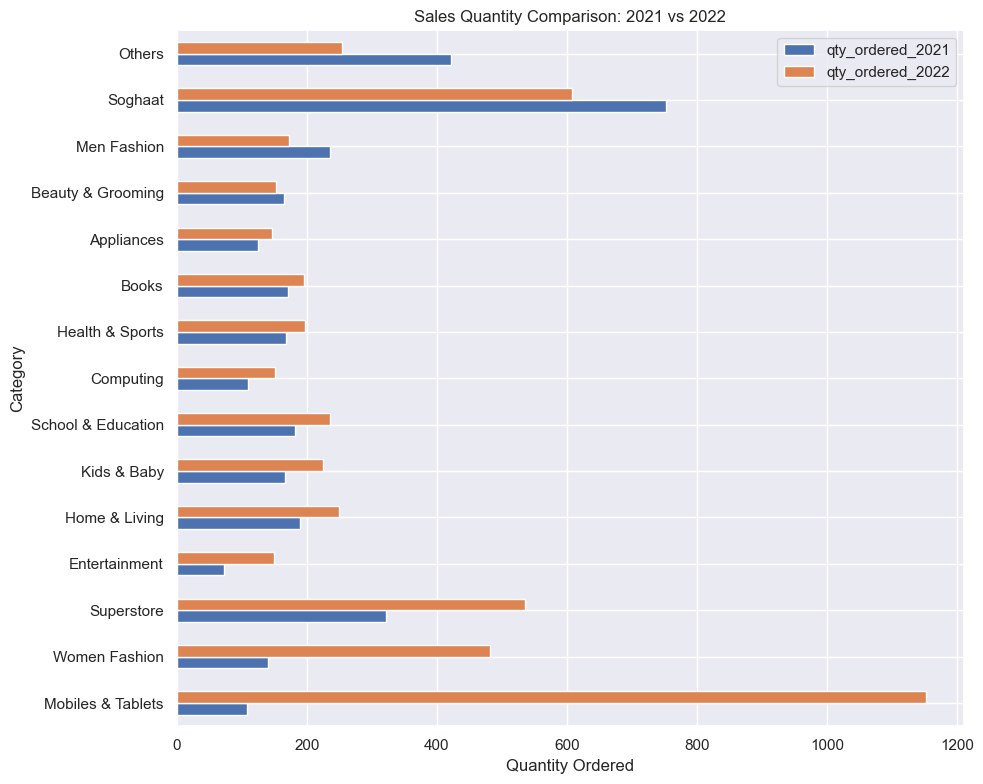

In [24]:
import matplotlib.pyplot as plt

# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
cat_data_2021_2022.plot(
    x='Category',
    y=['qty_ordered_2021', 'qty_ordered_2022'],
    kind='barh',
    figsize=(10, 8)
)

plt.xlabel('Quantity Ordered')
plt.ylabel('Category')
plt.title('Sales Quantity Comparison: 2021 vs 2022')
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Quantity')

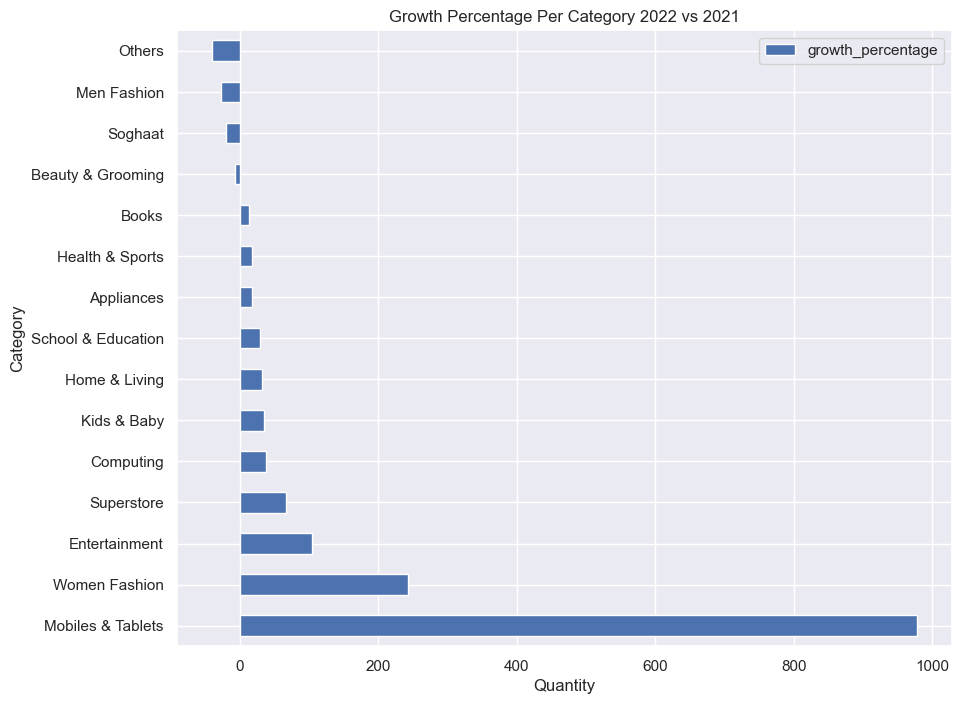

In [25]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(
    x='Category',
    y=['growth_percentage'],
    kind='barh',
    figsize=(10, 8)
)

plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')


In [26]:
# Answer 2.2

# Create dataframe with filter category = Others, year = 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(
    df[(df['Category'] == 'Others') & (df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]
    .groupby(by=['sku_name', 'Category'])['qty_ordered'].sum()
    .reset_index(name='qty_ordered_2022')
)

# Create dataframe with filter category = Others, year = 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(
    df[(df['Category'] == 'Others') & (df['is_valid'] == 1) & (df['order_date'].dt.year == 2021)]
    .groupby(by=['sku_name', 'Category'])['qty_ordered'].sum()
    .reset_index(name='qty_ordered_2021')
)

# JOIN the dataframes
others_2021_2022 = others_2021.merge(
    others_2022[['sku_name', 'qty_ordered_2022']],
    how='outer',
    on='sku_name'
)

# show the data
others_2021_2022


,sku_name,Category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,NaN
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,NaN,NaN,1.0
4,Am-PTV_ATS-004-M,Others,5.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,1.0
159,test-product-00,NaN,NaN,1.0
160,tucano_IPD7AN-BK,Others,1.0,NaN


In [27]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['Category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\1885446693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['Category'].fillna('Others', inplace=True)


,sku_name,Category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,1.0
1,Aladdin_Wrench_Snap N Grip_01,Others,1.0,0.0
2,Aladdin_bike_cover,Others,3.0,2.0
3,Alerashine_sku-09-XL,Others,0.0,1.0
4,Am-PTV_ATS-004-M,Others,5.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,1.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,1.0
159,test-product-00,Others,0.0,1.0
160,tucano_IPD7AN-BK,Others,1.0,0.0


In [28]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,Category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,200.0,40.0,-160.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,23.0,0.0,-23.0,DOWN
2,Telemall_MM-DR-HB-L,Others,23.0,2.0,-21.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,20.0,0.0,-20.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,13.0,0.0,-13.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,7.0,7.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,8.0,8.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,13.0,13.0,UP
160,SKMT_Medicine,Others,0.0,20.0,20.0,UP


C:\Users\DELL\AppData\Local\Temp\ipykernel_7656\1376083233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

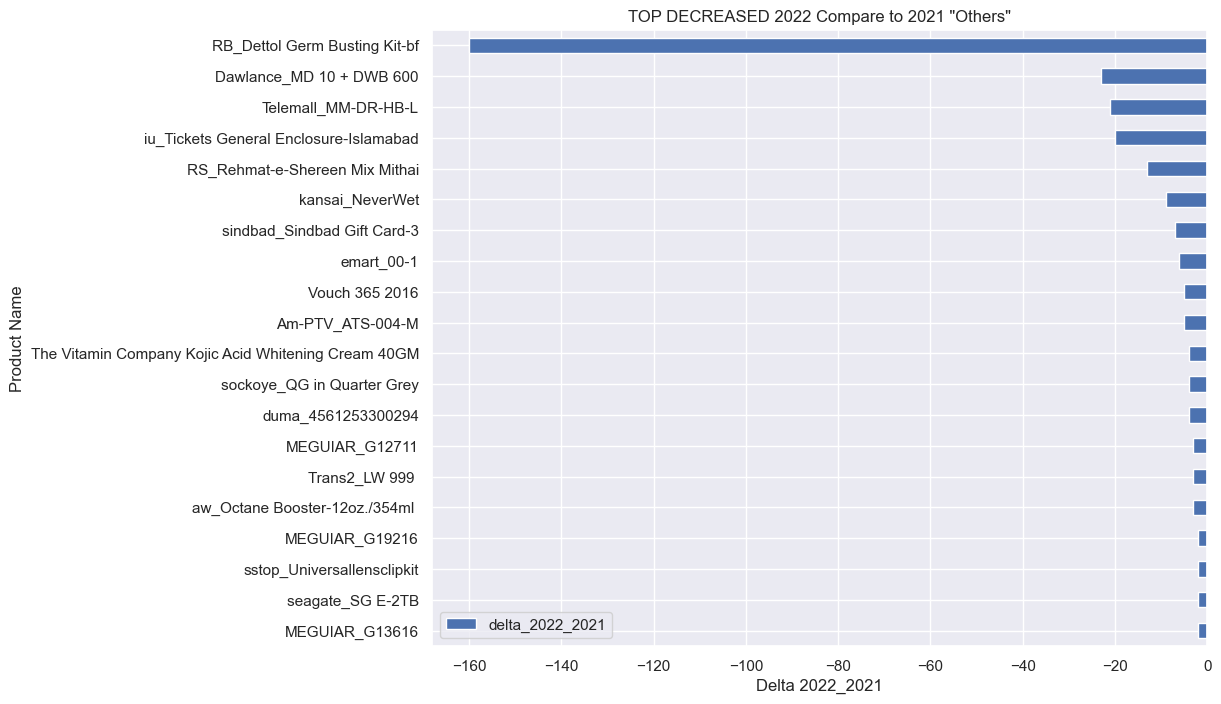

In [29]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',
                      y='delta_2022_2021',
                      kind='barh',
                      figsize=(10, 8))

plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')


Question 3
Dear Data Analyst,

As we prepare for the company’s upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not yet made a payment (is_gross = 1) during the year 2022. Specifically, we need the Customer IDs and their Registered Dates.

We kindly request your assistance in compiling and delivering this data to the Digital Marketing Team before the month’s end. Your support in this matter is greatly appreciated.

Best regards,
Digital Marketing Team

In [30]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:, ['customer_id', 'registration_date']][
    (df['is_gross'] == 1) &
    (df['is_valid'] == 0) &
    (df['is_net'] == 0) &
    (df['order_date'].dt.year == 2022)
]

# show the data
cs_gross_data


,customer_id,registration_date
0,C993531L,2021-11-08
8,C652751L,2022-07-19
19,C189144L,2022-07-01
22,C224183L,2022-04-07
23,C907186L,2022-05-08
...,...,...
5729,C217246L,2022-08-04
5734,C577176L,2022-06-01
5742,C744990L,2022-05-21
5756,C317976L,2021-11-26


In [31]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
    unique_customerid = len(x['customer_id'].unique().tolist())
    rows_count = len(x.index)
    return [unique_customerid, rows_count]

# run validation
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

# run the logic
if test[0] == test[1]:
    print('There is no duplicated data.')
else:
    print('There is duplicated data.')
    # remove the duplicate
    cs_gross_data.drop_duplicates(inplace=True)
    print('Data After : ', check_customerid(cs_gross_data))

# reset the index and show final data
cs_gross_data.reset_index(drop=True, inplace=True)
cs_gross_data


Data Before :  [820, 1023]
There is duplicated data.
Data After :  [820, 820]


,customer_id,registration_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


Question 4
Dear Data Analyst,

Between October and December 2022, we ran promotional campaigns every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales (before_discount) for weekends (Saturday and Sunday) compared to weekdays (Monday–Friday) for each month during this period. Please specify whether sales increased during weekends for each month.

The average daily sales (before_discount) for weekends versus weekdays across the entire three-month period.

We kindly request the data to be shared with us by the end of next week. Thank you for your continued support.

Best regards,
Campaign Team

In [32]:
# Answer No 4.1

# Add columns: month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [33]:
# Create dataframe for weekends data October–December 2022
data_weekends = pd.DataFrame(
    # filter
    df[(df['is_valid'] == 1) &
       (df['day_name'].isin(['Saturday', 'Sunday'])) &
       (df['month_id'] >= 10) &
       (df['year'] == 2022)]
    # groupby, aggregate before_discount
    .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()
    # round
    .round(2)
    # convert series to dataframe
    .reset_index(name='avg_sales_weekends')
    .sort_values(by='month_id', ascending=True)
)

# Create dataframe for weekdays data October–December 2022
data_weekdays = pd.DataFrame(
    # filter
    df[(df['is_valid'] == 1) &
       (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
       (df['month_id'] >= 10) &
       (df['year'] == 2022)]
    # groupby, aggregate before_discount
    .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()
    # round
    .round(2)
    # convert series to dataframe
    .reset_index(name='avg_sales_weekdays')
    .sort_values(by='month_id', ascending=True)
)
#Merge the dataframe
data_weekdays_weekends=data_weekdays.merge(data_weekends)
# show the data
data_weekdays_weekends


,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month Name', ylabel='Average Sales'>

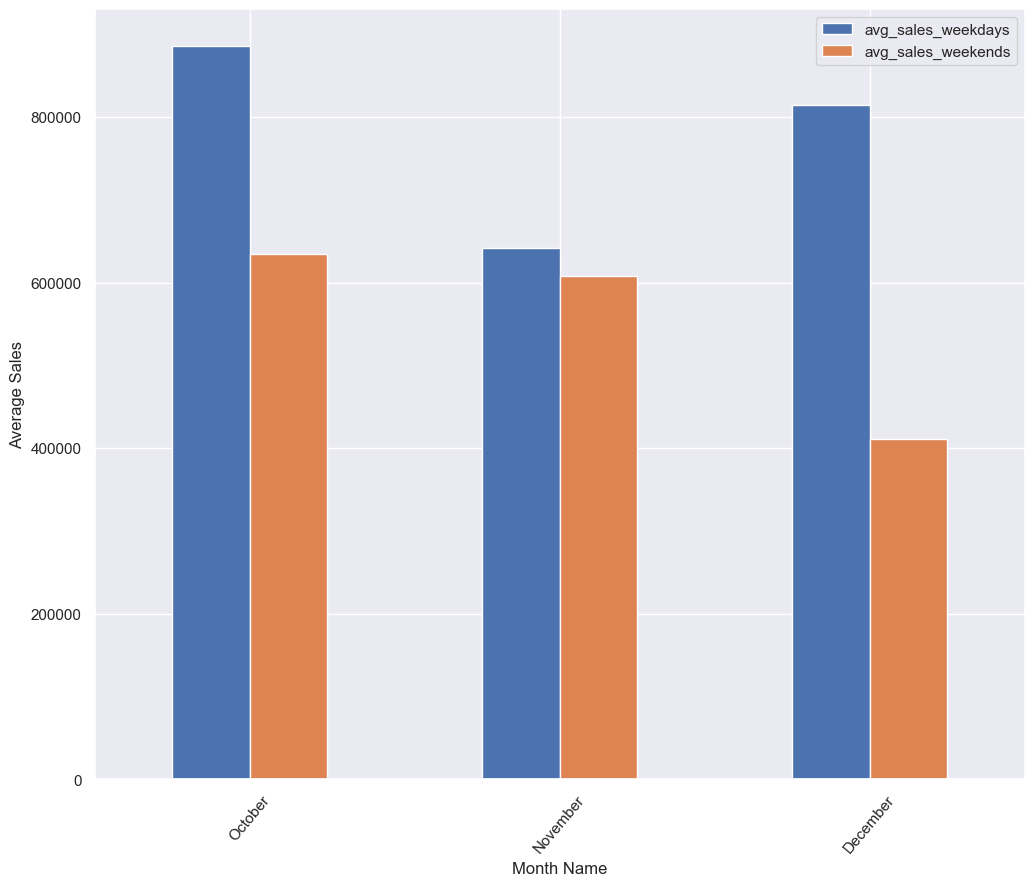

In [34]:
# Plot the data
sns.set()

data_weekdays_weekends.plot(
    x='month_name',
    y=['avg_sales_weekdays', 'avg_sales_weekends'],
    kind='bar',
    grid=True,
    xlabel='Month Name',
    ylabel='Average Sales',
    figsize=(12, 10),
    rot=50,         # Rotate x-axis labels
    table=False,
    secondary_y=False
)


In [35]:
# Answer No 4.2

# Filter dataframe df for weekends, October–December 2022
data_weekends_all = df[(df['is_valid'] == 1) &
                       (df['day_name'].isin(['Saturday', 'Sunday'])) &
                       (df['month_id'] >= 10) &
                       (df['year'] == 2022)]

# Filter dataframe df for weekdays, October–December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &
                       (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &
                       (df['month_id'] >= 10) &
                       (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {
    'Periode': 'Total 3 months',
    'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(), 2),
    'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(), 2),
    'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(), 2),
    'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean()) / data_weekends_all['before_discount'].mean()) * 100, 2),dtype=str) + '%'

}

# Create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# Show the data
compare_avg_weekends_weekdays


,Periode,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Periode', ylabel='Average Sales'>

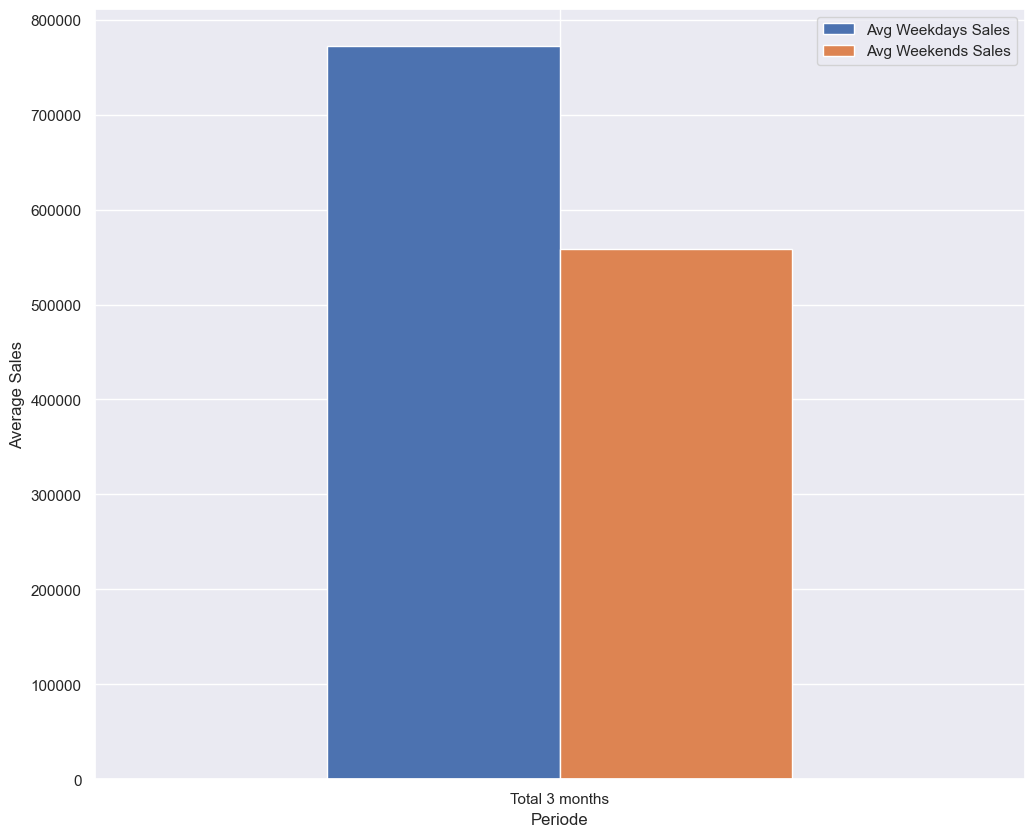

In [36]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Periode',
    y=['Avg Weekdays Sales', 'Avg Weekends Sales'],
    kind='bar',
    grid=True,
    # xlabel = 'Month Name',
    ylabel='Average Sales',
    figsize=(12, 10),
    rot=0,  # for rotate the text in xlabel
    table=False,
    secondary_y=False)


In [37]:
#specify the file name and path
file_path="C:/Users/DELL/Downloads/Google Looker Project/final_dataset.csv"
# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:/Users/DELL/Downloads/Google Looker Project/final_dataset.csv


Top 5 Products by Sales in 2022 for the "Mobiles & Tablets" Category Scenario: The Marketing Team is preparing for a Year-End Festival and needs to identify the top 5 products in the "Mobiles & Tablets" category that had the highest sales quantities in 2022. The products should be filtered to ensure only valid orders are included. Requirements: • Filter the data to include only products from the "Mobiles & Tablets" category in 2022, where the is_valid feature is set to 1. • Group the data by sku_name and category, and sum the qty_ordered for each product. • Rank the products based on their total sales quantity in descending order. • Display the top 5 products with the highest sales quantities. • Generate a horizontal bar chart showing the top 5 products by quantity. Key Features to Use: • category • order_date (for filtering by year) • is_valid (to filter valid orders) • sku_name (for product names) • qty_ordered (for sales quantities).


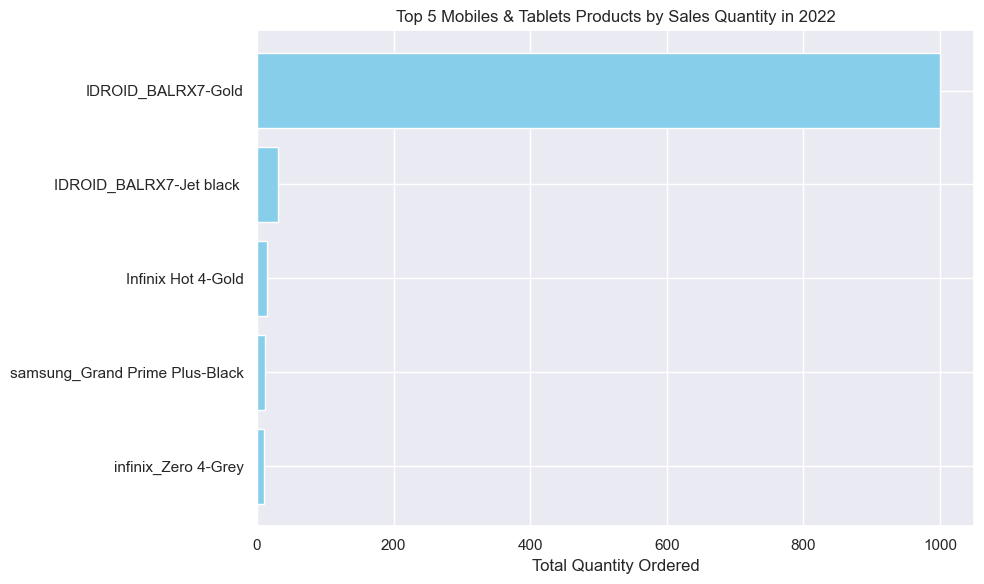

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/final_dataset.csv")  # Replace with your actual file name

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data for year 2022, valid orders, and correct category
filtered_df = df[
    (df['order_date'].dt.year == 2022) &
    (df['is_valid'] == 1) &
    (df['Category'] == 'Mobiles & Tablets')
]

# Group by sku_name and category, summing quantity ordered
grouped = filtered_df.groupby(['sku_name', 'Category'])['qty_ordered'].sum().reset_index()

# Sort by quantity ordered in descending order and get top 5
top5_products = grouped.sort_values(by='qty_ordered', ascending=False).head(5)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top5_products['sku_name'], top5_products['qty_ordered'], color='skyblue')
plt.xlabel('Total Quantity Ordered')
plt.title('Top 5 Mobiles & Tablets Products by Sales Quantity in 2022')
plt.gca().invert_yaxis()  # To show the highest bar on top
plt.tight_layout()
plt.show()


Average Quantity Sold per Product by Category Scenario: The Product Team wants to know the average quantity sold for each product category to identify potential inventory issues. Requirements: • Create a bar chart that shows the average quantity sold (AVG(qty_ordered)) for each product category. • Sort the categories by average quantity sold in descending order. Key Features to Use: • category • qty_ordered

C:\Users\DELL\AppData\Local\Temp\ipykernel_13524\1753500790.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_qty_per_category, x='Category', y='qty_ordered', palette='viridis')


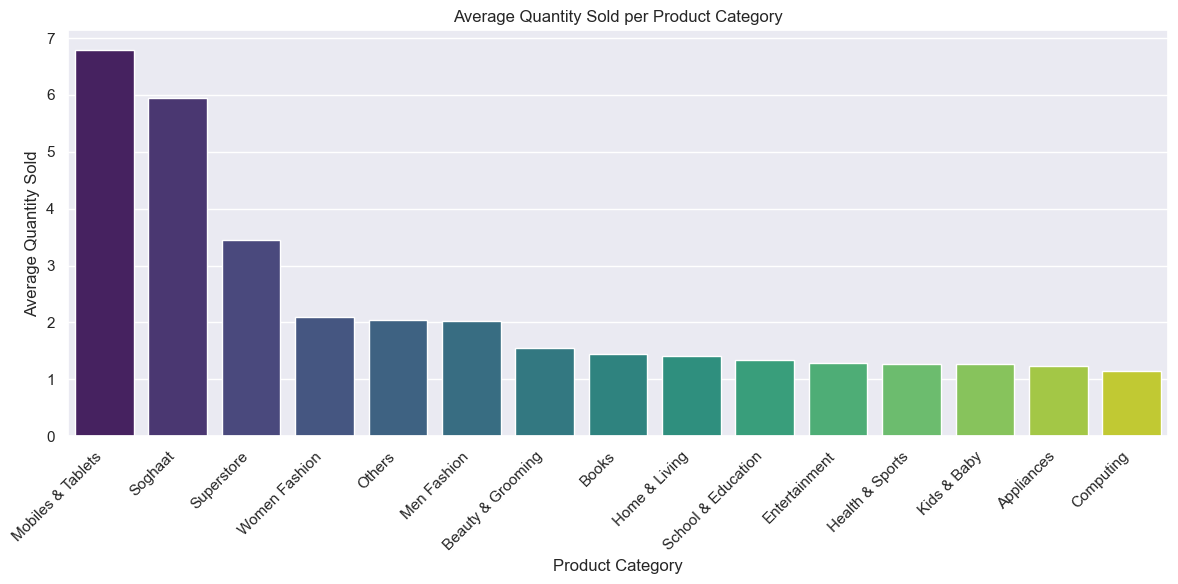

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("C:/Users/DELL/Downloads/Google Looker Project/final_dataset.csv")  # Replace with your actual file path

# Group by category and calculate average quantity ordered
avg_qty_per_category = df.groupby('Category')['qty_ordered'].mean().reset_index()

# Sort categories by average quantity sold in descending order
avg_qty_per_category = avg_qty_per_category.sort_values(by='qty_ordered', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_qty_per_category, x='Category', y='qty_ordered', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Sold')
plt.title('Average Quantity Sold per Product Category')
plt.tight_layout()
plt.show()
